## Building First Predictive Model
##### Machine learning (ML) is a powerful subset of artificial intelligence that enables systems to learn from data and make predictions or decisions without explicit programming

#### 1. , 2. Problem Definition and Data Collection
1. Classification: Predicting a categorical outcome (e.g., detecting if an email is spam or not).
2. Regression: Predicting a continuous value (e.g., forecasting stock prices).

Necessary Libraries:

pip install numpy pandas scikit-learn matplotlib seaborn imbalanced-learn shap joblib xgboost

In [1]:
#Load the Data Set
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigree', 'Age', 'Outcome'
]
data = pd.read_csv(url, names=columns)

# Quick look at the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


Each row represents one patient’s medical record, and the features are the patient’s medical measurements and demographic information.


The Outcome column is the target variable, indicating whether the patient tested positive for diabetes (1) or not (0).

The dataset will be used for predicting whether a patient is likely to have diabetes based on their medical data, which makes it ideal for binary classification tasks.

#### 3. Data Quality Assessment
Assessing the quality of your data is critical. Poor data can lead to poor model performance. We will check for missing values, duplicate entries, data types, and outliers. Additionally, ensure no data leakage occurs by carefully handling training and test splits, especially when working with imbalanced data.

Missing values:
 Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

Duplicate rows: 0

Data types:
 Pregnancies           int64
Glucose               int64
BloodPressure         int64
SkinThickness         int64
Insulin               int64
BMI                 float64
DiabetesPedigree    float64
Age                   int64
Outcome               int64
dtype: object

Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.00000

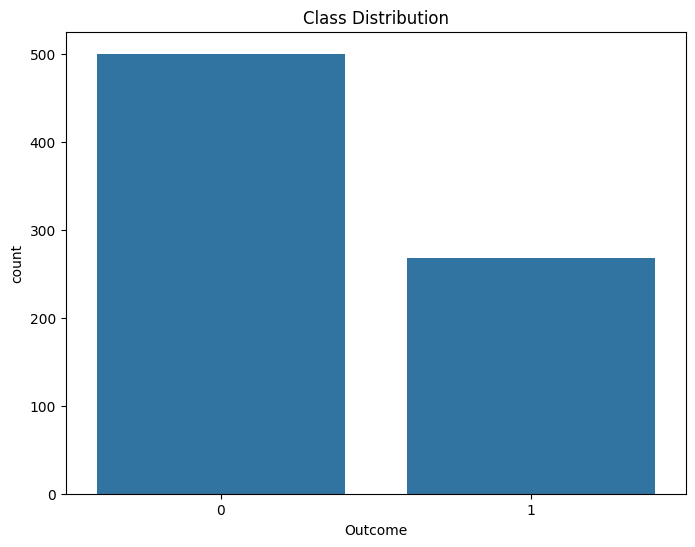

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #statistical functions

def assess_data_quality(df):
    # Check for missing values in every column
    print("Missing values:\n", df.isnull().sum())
    
    # Check for duplicate rows
    # The duplicated() method returns a Series indicating whether each row is a duplicate, 
    # and sum() counts the total number of duplicate rows.
    print("\nDuplicate rows:", df.duplicated().sum())
    
    # Check data types. It helps determine whether each column has the appropriate type
    print("\nData types:\n", df.dtypes)
    
    # Summary statistics
    # This provides summary statistics for each numerical column in the dataset, 
    # including metrics like mean, standard deviation, min, max, and various percentiles
    print("\nSummary statistics:\n", df.describe())
    
    # Check for outliers using Z-score (Valores atípicos)
    # df.select_dtypes(include=[np.number]): This selects only the numerical columns from the DataFrame for outlier detection.
    # stats.zscore(): This function calculates the Z-scores for each numerical column. The Z-score is a measure of how many standard deviations a data point is from the mean.
    # np.abs(z_scores) > 3: This condition identifies data points that are more than 3 standard deviations away from the mean (considered potential outliers).
    # sum(axis=0): This sums the number of outliers for each column.
    z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
    outliers = (np.abs(z_scores) > 3).sum(axis=0)
    print("\nNumber of outliers (Z-score > 3):\n", outliers)
    
    # Check class balance for binary classification
    # Outcome’ in df.columns: This checks if the column 'Outcome' exists in the dataset
    # e.g., 0 for no diabetes and 1 for diabetes
    if 'Outcome' in df.columns:
        class_balance = df['Outcome'].value_counts(normalize=True)
        print("\nClass balance:\n", class_balance)
        
        # Visualize class balance
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Outcome', data=df)
        plt.title('Class Distribution')
        plt.show()

# Perform data quality assessment
assess_data_quality(data)

Handling Missing Values and Zero Entries:

In medical datasets, zeros may appear in places where they aren’t physiologically possible (e.g., blood pressure or glucose levels). We replace these with NaN values and impute them using the median.

In [3]:
# Replace zeros with NaN for specific columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Impute missing values with median
data[cols_with_zero] = data[cols_with_zero].fillna(data[cols_with_zero].median())

# Verify missing values after imputation
print(data.isnull().sum())

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64


Outlier Detection:

Visualize outliers using box plots to get a better understanding of the spread and detect potential issues.

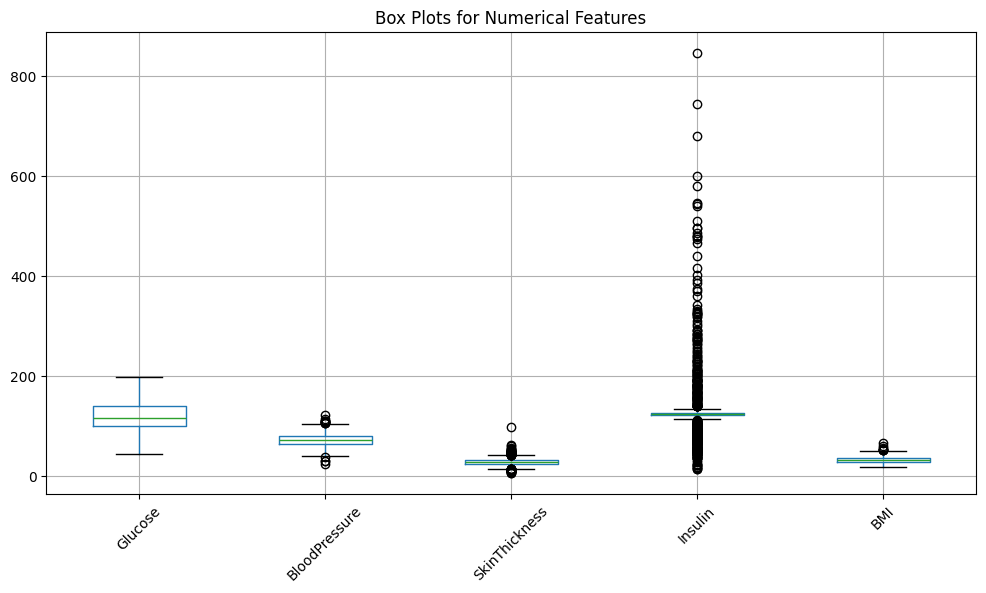

In [4]:
#This code creates box plots for multiple numerical features using Matplotlib and pandas. 
# Box plots are a standard way of displaying the distribution of data based on five summary statistics: minimum, 
# first quartile (Q1): the value under which 25% of data points are found when arranged in increasing order, 
# median (Q2), 
# third quartile (Q3): the value under which 75% of data points are found when arranged in increasing order, 
# and maximum. 
# They also help identify outliers in the data. 
plt.figure(figsize=(12, 6))
data.boxplot(column=cols_with_zero)
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.show()

Why Box Plots Are Useful

1. Identify Outliers: Box plots make it easy to spot outliers, which could affect statistical analyses or model performance.
2. Compare Distributions: By plotting multiple box plots side by side, you can compare the distributions of different numerical features. For example, you can see whether some features have a wider range of values or more outliers than others.
3. Summarize Data: Box plots provide a clear and concise summary of the central tendency (median) and variability (IQR) of the data.

### 4. Exploratory Data Analysis (EDA)

EDA helps you understand the structure and patterns in your data. Through visualizations, you can spot trends, correlations, and distributions of features.

#### Distribution of Numerical Features:

This code visualizes the distribution of each numerical feature in the dataset by generating histograms with KDE lines. It creates a grid of subplots, where each subplot corresponds to a feature and displays its distribution. This kind of visualization is essential in exploratory data analysis (EDA), as it helps identify patterns, skewness, and outliers in the data, all of which are important considerations for preprocessing and model building.

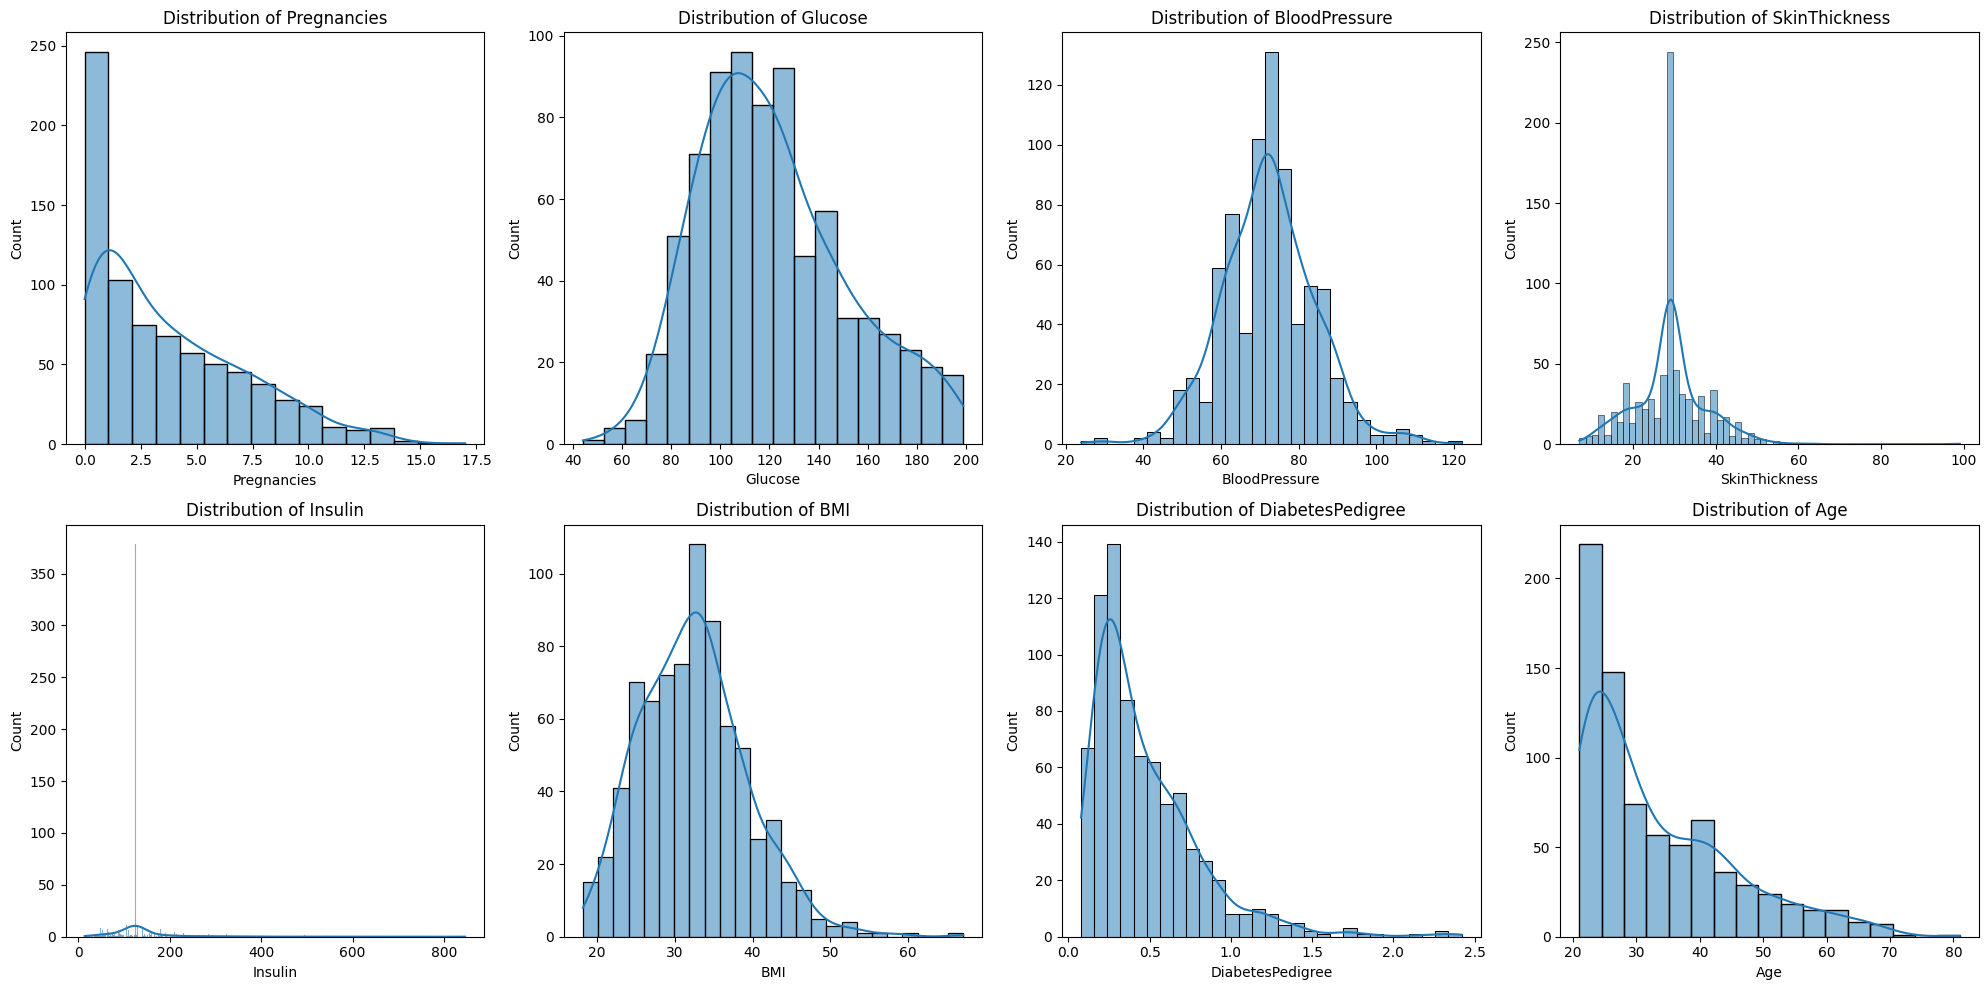

In [5]:
# Selecting numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Outcome')

#Creating the Subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### Correlation Heatmap with Annotations

This code generates a correlation heatmap using Seaborn and Matplotlib to visualize the pairwise correlations between numerical features in a dataset. A correlation heatmap helps identify relationships between variables, indicating how strongly or weakly they are associated with each other. Let’s break down each part of the code.

The resulting matrix shows how each feature in the dataset is correlated with the others, with values ranging from -1 to 1:

1. A correlation of 1 means a perfect positive relationship (when one variable increases, the other increases).
2. A correlation of -1 means a perfect negative relationship (when one variable increases, the other decreases).
3. A correlation close to 0 means no linear relationship between the variables.

-------

4. Red indicates a positive correlation between two features.
5. Blue indicates a negative correlation between two features.
6. White or light colors indicate weak or no correlation (values close to zero).

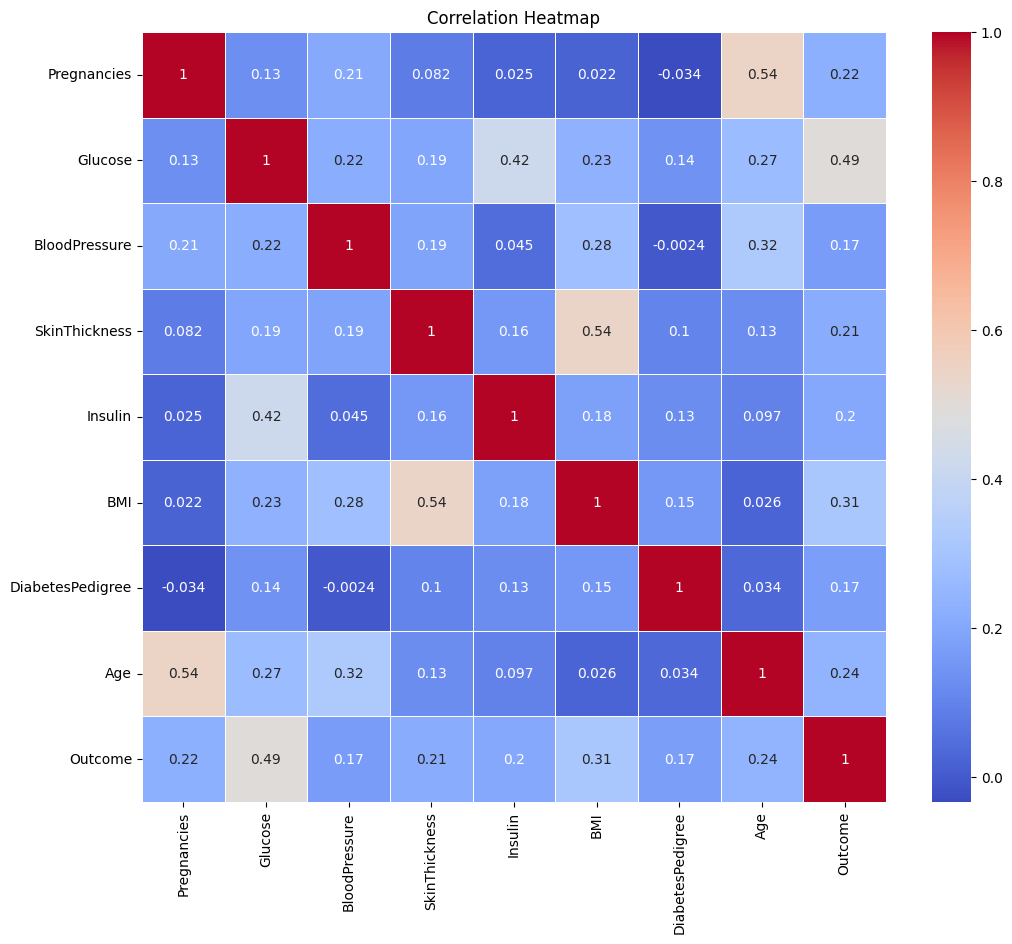

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlations Between Features: The heatmap visualizes the strength and direction of the linear relationships between pairs of features. For example:

1. If two features have a correlation coefficient close to 1, they are strongly positively correlated, meaning as one increases, the other also increases.
2. If two features have a correlation coefficient close to -1, they are strongly negatively correlated, meaning as one increases, the other decreases.
3. If the correlation is close to 0, there is no linear relationship between the features.

Feature Relationships: The heatmap helps identify which features are related to each other. For example, in a dataset about health, you might find that features like BMI and Glucose are positively correlated, which could be useful information for feature engineering or model interpretation.

##### Pair Plot for Binary Classification:

This code creates a pair plot using Seaborn, a powerful Python visualization library, to visualize the relationships between different features in the dataset. Pair plots are particularly useful for exploring pairwise relationships between features and understanding how the data is distributed across different classes.

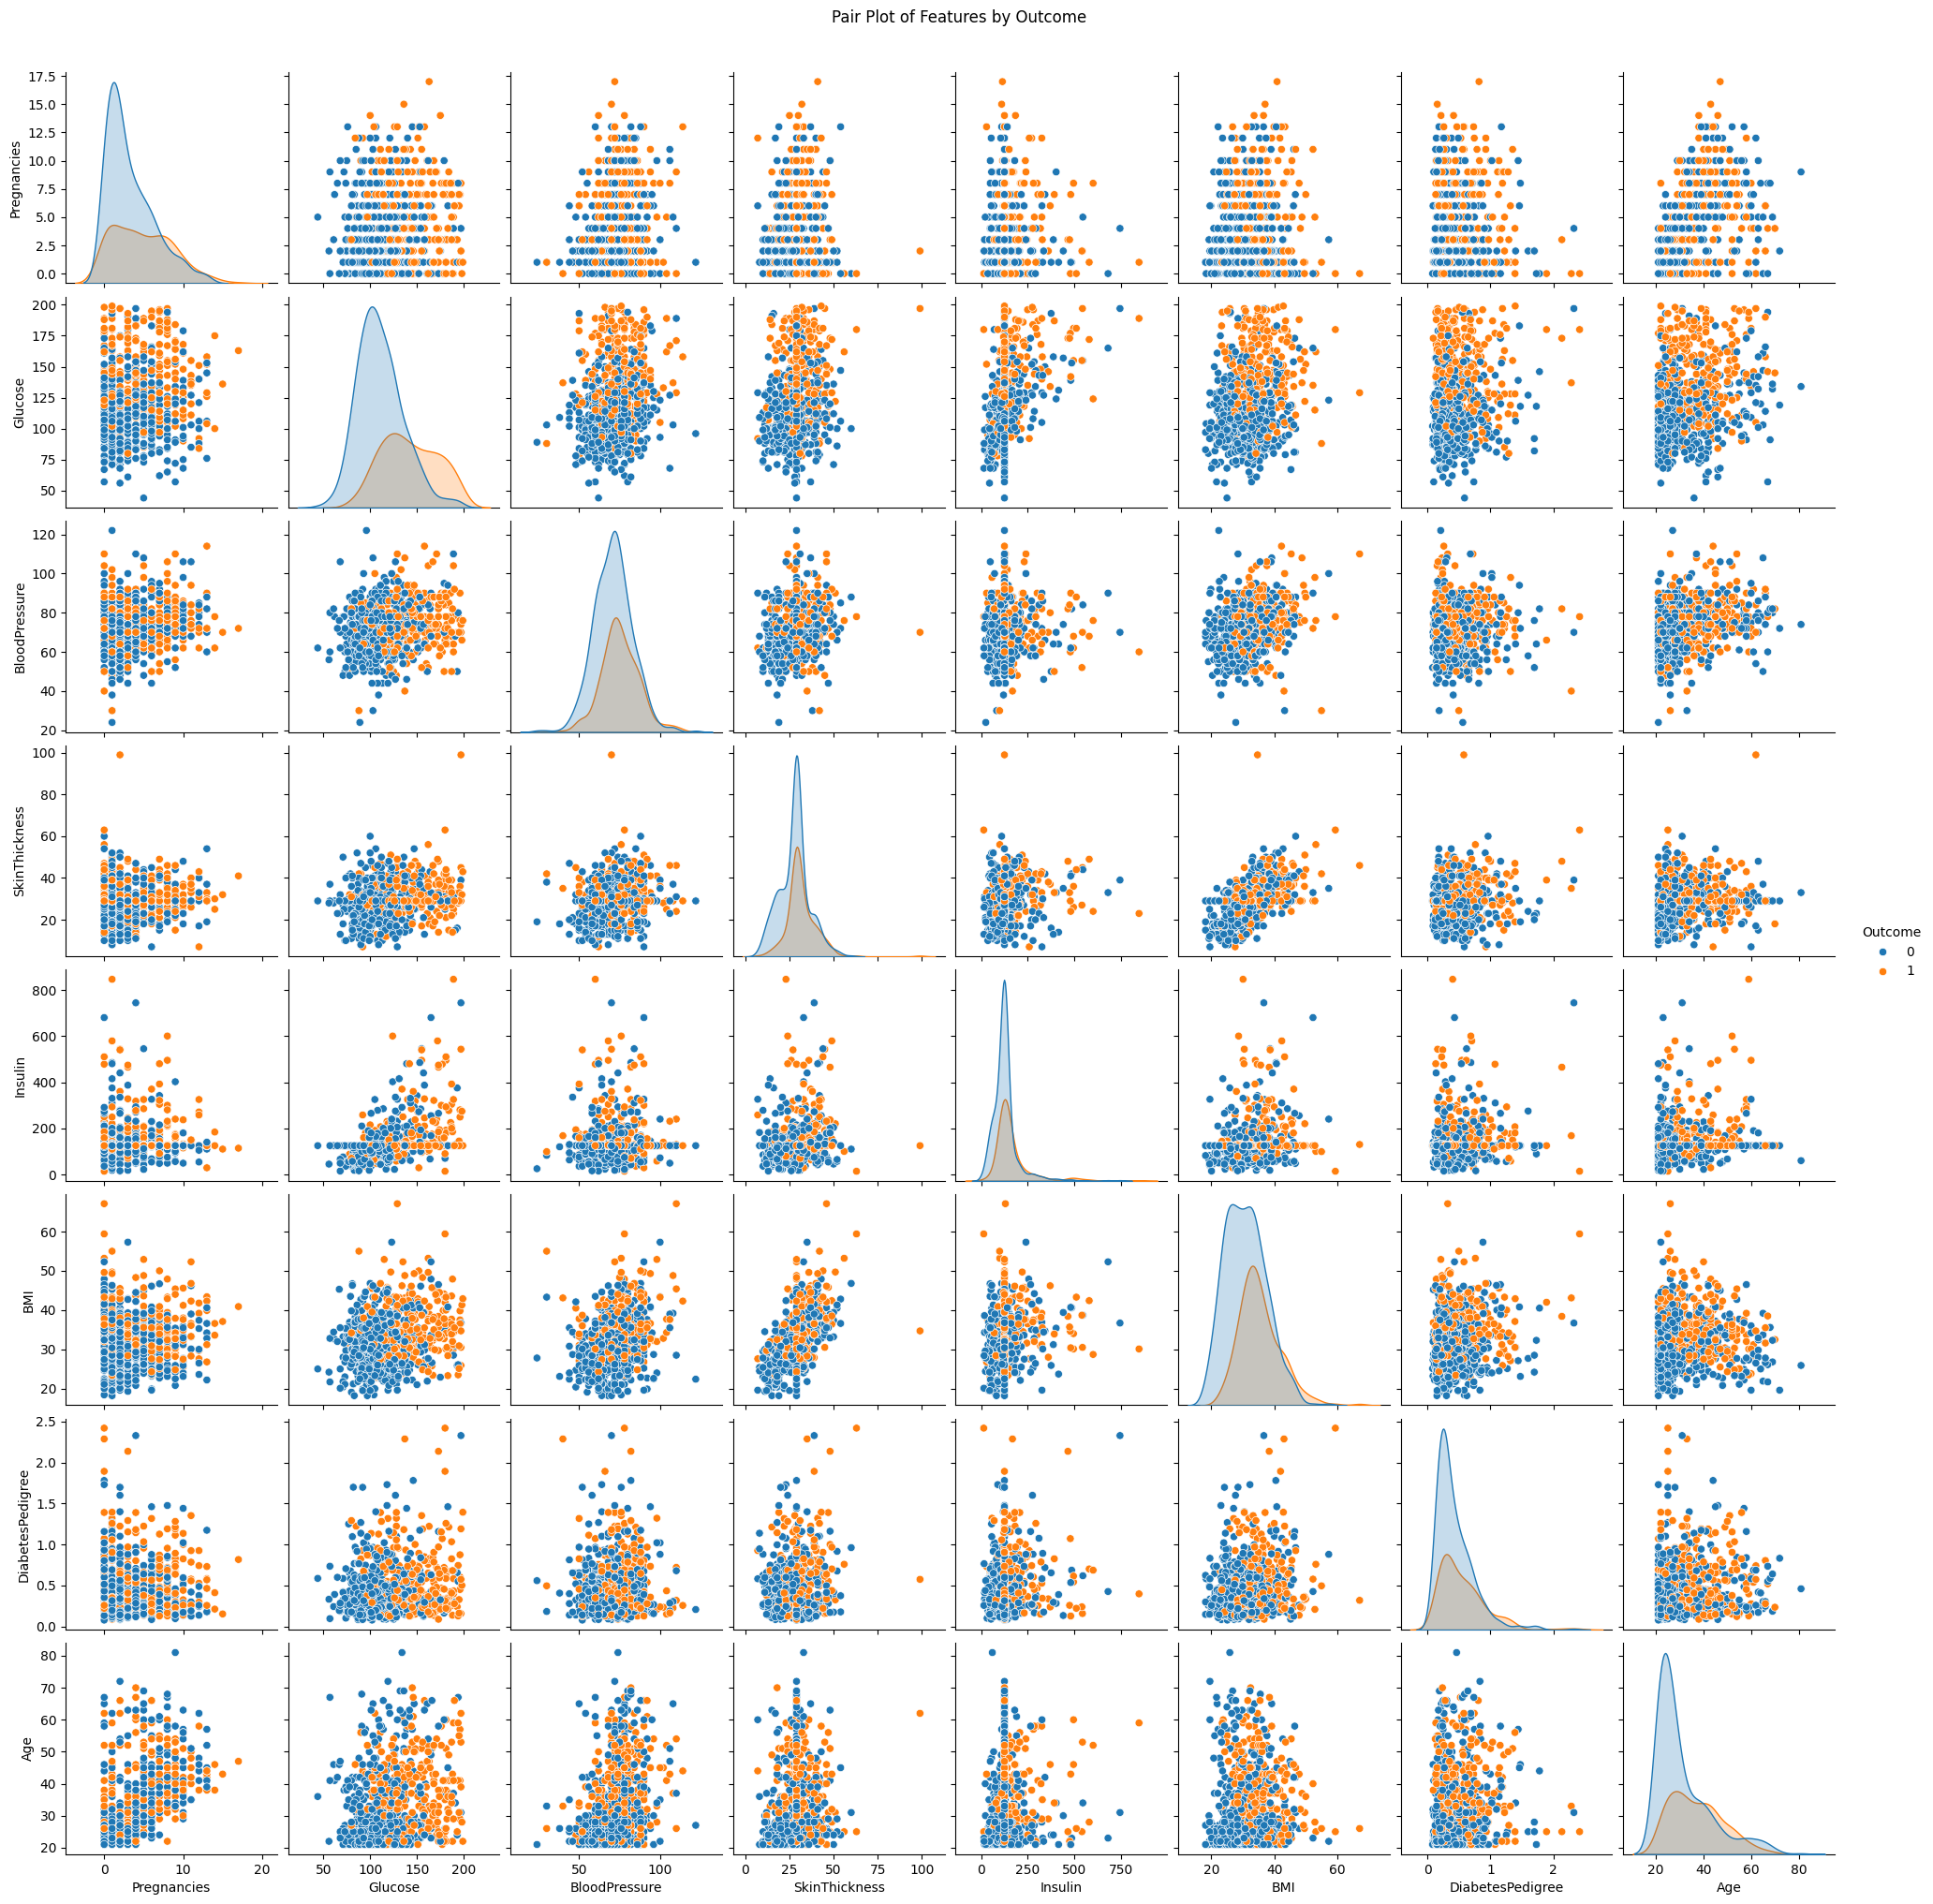

In [7]:
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02)
plt.show()

For example, if certain features are well-separated by color, this suggests that those features are good predictors of the target variable.

### 5. Data Preprocessing

Preprocessing involves preparing the data for machine learning by handling missing values, scaling features, and splitting the data into training and testing sets.

In [8]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train: The subset of the feature data used to train the model.

X_test: The subset of the feature data used to test the model after it has been trained.

y_train: The subset of the target variable used for training the model.

y_test: The subset of the target variable used to evaluate the model’s performance on unseen data.

test_size=0.2: This specifies that 20% of the data will be allocated to the test set, while the remaining 80% will be used for training. Adjusting this ratio allows you to control how much data is used for testing vs. training.

random_state=42: This is a seed for the random number generator. By setting a specific seed (e.g., 42), we ensure that the split will always produce the same training and test sets each time the code is run. This ensures reproducibility of results.

#### Handling Imbalanced Dataset with SMOTE:
To handle class imbalance, we apply SMOTE to oversample the minority class in the training set.

pip install imbalanced-learn

SMOTE (técnica de sobremuestreo de minorías sintéticas) es una herramienta poderosa para manejar datos desequilibrados en el aprendizaje automático. En muchos escenarios del mundo real, los conjuntos de datos suelen estar desequilibrados, lo que significa que una clase puede tener significativamente menos observaciones que otras. Esto puede generar modelos sesgados que funcionan mal en la clase minoritaria. SMOTE es una técnica que ayuda a abordar este problema al generar muestras sintéticas de la clase minoritaria, equilibrando así el conjunto de datos.

El algoritmo SMOTE fue presentado por primera vez en un artículo de 2002 de Nitesh V. Chawla, Kevin W. Bowyer, Lawrence O. Hall y W. Philip Kegelmeyer. Desde entonces, se ha convertido en una técnica ampliamente utilizada para manejar datos desequilibrados en el aprendizaje automático. SMOTE funciona seleccionando aleatoriamente una observación de la clase minoritaria y generando nuevas observaciones sintéticas que sean similares a ella. Esto se hace seleccionando uno o más de sus vecinos más cercanos y creando nuevas observaciones a lo largo de los segmentos de línea que los conectan. El resultado es un conjunto de datos más grande y más equilibrado que puede usarse para entrenar modelos de aprendizaje automático que estén menos sesgados hacia la clase mayoritaria.

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


Class distribution after SMOTE:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64


#### Feature Scaling:
To ensure that features have the same scale, we use StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

we standardize the training data:

fit_transform(): This method combines two actions: first, it calculates the mean and standard deviation of each feature in X_train_resampled (the resampled training dataset), and then it scales each feature accordingly. After scaling, each feature will have a mean of 0 and a variance of 1.

X_train_resampled: This is the training dataset, likely resampled using a technique like SMOTE to handle class imbalance. Scaling ensures that all features are on the same scale, which is particularly important when working with models sensitive to feature magnitude (e.g., Logistic Regression, SVM).

we transform the test data using the scaler fitted on the training data:

transform(): This applies the scaling learned from the training data (i.e., the mean and standard deviation) to the test data, X_test. It's important to note that we do not fit the scaler again on the test data. Instead, we use the statistics (mean and standard deviation) from the training data to ensure consistency between training and testing.

### 6. Feature Engineering and Selection
Feature engineering can significantly improve model performance. Creating new features like interaction terms can capture relationships between variables.

In [11]:
# Convert arrays back to DataFrames for ease of manipulation
X_train_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Create interaction term
X_train_df['Glucose_BMI'] = X_train_df['Glucose'] * X_train_df['BMI']
X_test_df['Glucose_BMI'] = X_test_df['Glucose'] * X_test_df['BMI']

This new feature, Glucose_BMI, captures the combined effect of glucose levels and body mass index, which may have a non-linear relationship with the target variable. By creating such interaction terms, the model can learn more complex patterns that might not be obvious from the individual features.

In this code, we converted the training and test arrays back into pandas DataFrames for easier manipulation and created a new interaction feature between Glucose and BMI. This type of feature engineering can help the model capture complex relationships between features, leading to better predictive accuracy. Interaction terms like Glucose_BMI are particularly useful when we suspect that two features may have a combined effect on the target variable.

#### Feature Selection with Recursive Feature Elimination (RFE):

We use RFE to select the most important features for model training.

This code demonstrates how to use Recursive Feature Elimination (RFE) in combination with a Logistic Regression model to select the most important features for a machine learning task. Feature selection is a key step in improving model performance and reducing overfitting by keeping only the most relevant features. 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Apply RFE to Logistic Regression model
model = LogisticRegression(max_iter=1500, solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train_df, y_train_resampled)


# Selected features
filter = rfe.support_
selected_features = [i for indx,i in enumerate(X.columns) if filter[indx] == True] + ['Glucose_BMI']
print("Selected features:", selected_features)

# Transform datasets
X_train_selected = rfe.transform(X_train_df)
X_test_selected = rfe.transform(X_test_df)

Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigree', 'Age', 'Glucose_BMI']


By calling .fit(), RFE begins the feature selection process by recursively eliminating the least important features, training the logistic regression model at each step.

After this transformation, the datasets contain fewer features, but these are the most important ones based on the RFE process. This helps reduce dimensionality, potentially improving model performance and generalization.

### 7. Model Selection and Training

We will evaluate multiple models to identify the best-performing one. We use cross-validation to assess model performance reliably.

This code demonstrates how to evaluate different machine learning models using cross-validation with the cross_val_score() function from scikit-learn. Specifically, it compares the performance of Logistic Regression, Random Forest, and Support Vector Machine (SVM) models on a binary classification task using the ROC-AUC scoring metric. Cross-validation helps ensure that the model's performance is consistent across different splits of the data, providing a robust measure of generalization

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
lr_model = LogisticRegression(max_iter=500, solver='lbfgs')
lr_scores = cross_val_score(lr_model, X_train_selected, y_train_resampled, cv=5, scoring='roc_auc')
print(f'Logistic Regression CV AUC: {lr_scores.mean():.2f} ± {lr_scores.std():.2f}')

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_selected, y_train_resampled, cv=5, scoring='roc_auc')
print(f'Random Forest CV AUC: {rf_scores.mean():.2f} ± {rf_scores.std():.2f}')

# Support Vector Machine
svm_model = SVC(probability=True)
svm_scores = cross_val_score(svm_model, X_train_selected, y_train_resampled, cv=5, scoring='roc_auc')
print(f'SVM CV AUC: {svm_scores.mean():.2f} ± {svm_scores.std():.2f}')

Logistic Regression CV AUC: 0.85 ± 0.02
Random Forest CV AUC: 0.89 ± 0.03
SVM CV AUC: 0.87 ± 0.03


cross_val_score: This function performs cross-validation by splitting the dataset into several folds, training the model on each fold, and computing the specified performance metric for each fold. It then returns the performance scores for all folds, which can be averaged for a more reliable estimate of the model’s performance.

This previous 
code compares the performance of three different models — Logistic Regression, Random Forest, and Support Vector Machine (SVM) — using cross-validation and the ROC-AUC score. By evaluating each model across multiple folds, we get a better estimate of their true performance, helping to choose the best model for the task. The mean ROC-AUC score tells us which model is performing better overall, while the standard deviation shows how stable the model’s performance is across different subsets of the data. This approach ensures that the selected model generalizes well to unseen data.

#### Training the Best Model (Random Forest Classifier):

This code snippet trains a Random Forest classifier using the training data. Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting.

The .fit() method is used to train a machine learning model on the given dataset. It allows the model to learn the relationship between the features (input variables) and the target labels (output variables)

In [14]:
rf_model.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(random_state=42)

Decision Tree Construction: The Random Forest algorithm creates multiple decision trees. Each tree is built using a random subset of the training data (both features and samples). This introduces diversity among the trees, reducing the risk of overfitting.

Bootstrapping: Random Forest uses bootstrap sampling, meaning that each tree is trained on a random sample of the training data with replacement. This allows each tree to focus on different parts of the dataset.

Splitting Criteria: Each tree is built by splitting the data at various points based on a specific criterion, such as Gini impurity or entropy. The goal is to create branches that result in pure subsets (where the target label is the same for all samples in a subset).

Voting: After training, the model combines the predictions of all the trees. For classification tasks, each tree votes for the predicted class, and the class with the most votes becomes the final prediction.

The model, after the .fit() method is called, has been trained on the dataset. It has learned the relationships between the features in X_train_selected and the labels in y_train_resampled. After training, this model can be used to make predictions on new, unseen data using the .predict() or .predict_proba() methods.

### 8. Hyperparameter Tuning

To optimize model performance, we use GridSearchCV and RandomizedSearchCV to find the best hyperparameters.

This code demonstrates the use of GridSearchCV, a powerful tool from scikit-learn for optimizing machine learning models through hyperparameter tuning. By systematically searching over a predefined set of hyperparameters, GridSearchCV helps find the best model configuration to improve performance. In this case, it’s applied to a Random Forest model (rf_model).

Using GridSearchCV

In [15]:
#######################
# Using GridSearchCV
#####################

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# n_jobs=-1 argument enables the use of all available CPU cores
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

#This method performs an exhaustive evaluation of every combination of the hyperparameters defined in the grid (param_grid). 
# For each combination, the model is trained and evaluated using 5-fold cross-validation. 
# This ensures that the evaluation is robust and not influenced by a particular train-test split.

grid_search.fit(X_train_selected, y_train_resampled)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation AUC: {grid_search.best_score_:.2f}')

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation AUC: 0.89


scoring=’roc_auc’: This is the metric we aim to optimize. ROC-AUC (Area Under the Receiver Operating Characteristic Curve) is commonly used in classification tasks to evaluate model performance.

Key Considerations

Exhaustive Search: GridSearchCV explores all possible combinations of hyperparameters, ensuring that the best combination within the specified grid is found. However, it can be computationally expensive, especially if the parameter grid is large.

Performance Metric: In this case, ROC-AUC was chosen as the scoring metric, which is particularly useful for imbalanced classification problems. Depending on the problem, you might choose other metrics such as accuracy, precision, recall, or F1-score.

Parallelization: The n_jobs=-1 argument enables the use of all available CPU cores, making the search faster, particularly when the parameter grid is large. This is an important consideration for performance optimization.

Using RandomizedSearchCV for Larger Search Spaces

In [16]:
#######################
# RandomizedSearchCV for Larger Search Spaces
#####################

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(50, 500, 10)],
    #[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    'max_depth': [None] + [int(x) for x in np.linspace(5, 50, 10)],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

print(f'Best parameters from RandomizedSearchCV: {random_search.best_params_}')

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters from RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 25, 'bootstrap': True}


This code snippet demonstrates the use of RandomizedSearchCV, a more efficient hyperparameter tuning method from scikit-learn. Unlike GridSearchCV, which exhaustively searches every combination of hyperparameters, RandomizedSearchCV samples a fixed number of hyperparameter combinations randomly from the defined search space.

n_estimators: The number of trees in the Random Forest. Here, we generate 10 equally spaced values between 50 and 500 using np.linspace(), and then convert them to integers.

max_depth: The maximum depth of the trees. We allow None for unlimited depth, as well as integer values between 5 and 50.

min_samples_split: The minimum number of samples required to split an internal node. We test three values — 2, 5, and 10 — to control how complex the trees can grow.

bootstrap: A boolean flag to indicate whether bootstrapping is used in the Random Forest. We evaluate both True (with replacement) and False (without replacement).

Key Considerations

Efficiency: RandomizedSearchCV is more efficient than GridSearchCV because it randomly samples from the parameter grid instead of trying every possible combination. This is especially beneficial when the parameter space is large, as it reduces the number of configurations to test while still exploring a broad range of values.

Performance Metric: The ROC-AUC metric was chosen for this search, but the metric used for optimization can be changed based on the problem. For example, in some tasks, accuracy, precision, recall, or F1-score may be more appropriate.

n_iter: The number of iterations (n_iter=50) controls how many combinations are tried. Increasing this number will explore more of the search space but will also increase computation time.

### 9. Model Evaluation

Evaluating your model on the test set provides insights into how well the model generalizes to unseen data. Use multiple evaluation metrics like confusion matrix, ROC-AUC, precision-recall, and F1 score.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score

# Predictions
#Random Forest Classifier

# This represents the predicted class labels generated by the trained Random Forest model (rf_model) 
# for the test data (X_test_selected). 
# It returns binary values (e.g., 0 for "no" and 1 for "yes")
y_pred = rf_model.predict(X_test_selected)

#The predict_proba() method returns an array of probabilities for both classes (0 and 1), and 
# [:, 1] extracts the probabilities of class 1 (the positive class, e.g., having diabetes)
y_proba = rf_model.predict_proba(X_test_selected)[:, 1]


The **classification report** provides a detailed summary of model performance across several key metrics:

Precision: The proportion of true positives among all positive predictions (TP / (TP + FP)).

Recall (Sensitivity): The proportion of true positives among all actual positives (TP / (TP + FN)).

F1-score: The harmonic mean of precision and recall, providing a single score that balances both (2TP / (2TP+FN+TP)).

Support: The number of actual occurrences of each class in the test data.

In [18]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.66      0.78      0.72        55

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154



The **confusion matrix** breaks down predictions into four categories:

True Positives (TP): Correctly predicted positive instances.

True Negatives (TN): Correctly predicted negative instances.

False Positives (FP): Incorrectly predicted positive instances.

False Negatives (FN): Incorrectly predicted negative instances.

This matrix is visualized using a heatmap to make it easier to interpret. The matrix helps you understand the distribution of errors made by the model.

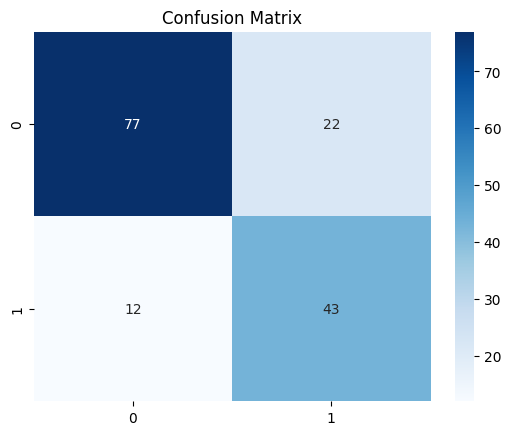

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

The **ROC-AUC score** measures the area under the ROC curve and is used to evaluate the model’s ability to distinguish between the positive and negative classes. A score of 1 indicates a perfect model, while a score of 0.5 indicates a model no better than random guessing. In this case, we calculate the ROC-AUC based on the predicted probabilities (y_proba), which allows us to assess the model across various thresholds.

In [20]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')


ROC-AUC Score: 0.83


The **ROC curve** plots the true positive rate (TPR or recall) against the false positive rate (FPR) across different decision thresholds. It provides a visual way to evaluate the trade-off between sensitivity and specificity for the model. The diagonal line represents random chance, and the further the ROC curve is from this diagonal, the better the model is at distinguishing between the classes. The AUC (area under the curve), which we calculated earlier, is displayed as well.

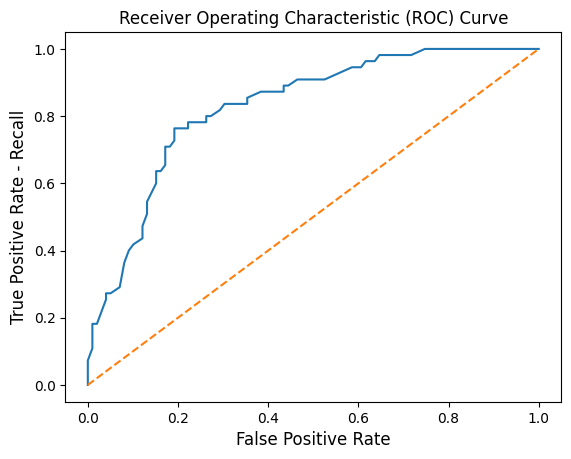

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate - Recall', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()



The **precision-recall curve** plots precision against recall for different probability thresholds. This curve is particularly useful when dealing with imbalanced datasets, as it provides insight into how well the model maintains precision as recall increases. A model with high precision and high recall will have a curve that stays close to the top-right corner.

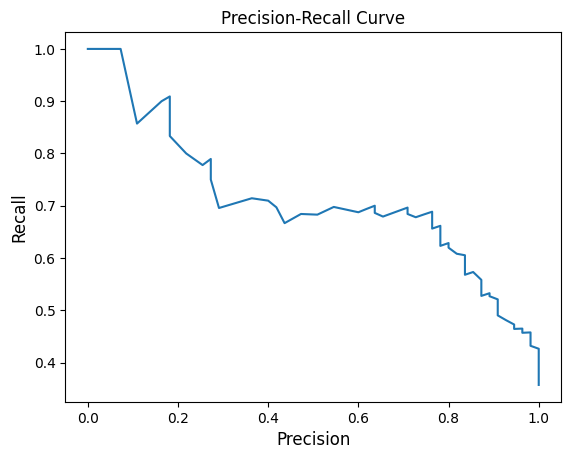

In [22]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Precision-Recall Curve')
plt.show()

The **F1 score**, which is the harmonic mean of precision and recall. The F1 score provides a single number that balances both metrics, making it especially useful when you need to account for both false positives and false negatives. A higher F1 score indicates better model performance in terms of precision-recall trade-offs

In [23]:
# F1 Score (2TP / (2TP+FN+TP))
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.72


### 10. Model Interpretability

Model interpretability is critical for understanding how predictions are made, especially when using complex models like Random Forest or XGBoost. We use SHAP to explain model predictions.

Using SHAP for Model Explainability:

In [24]:
#pip install shap

In [25]:
import shap

# Convert scaled data back to DataFrame for SHAP
selected_features = [i for indx,i in enumerate(X.columns) if filter[indx] == True]
X_test_df = pd.DataFrame(X_test_selected, columns=selected_features)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_df)

# SHAP summary plot
shap.summary_plot(shap_values[:,:,1], X_test_df)


ModuleNotFoundError: No module named 'shap'

### 11. Ensemble Methods

### Using XGBoost
XGBoost is a high-performance ensemble method using gradient boosting. Let’s compare it to Random Forest

In [ ]:
#pip install xgboost

In [ ]:
#pip install --upgrade pip

XGBoost ROC-AUC Score: 0.80


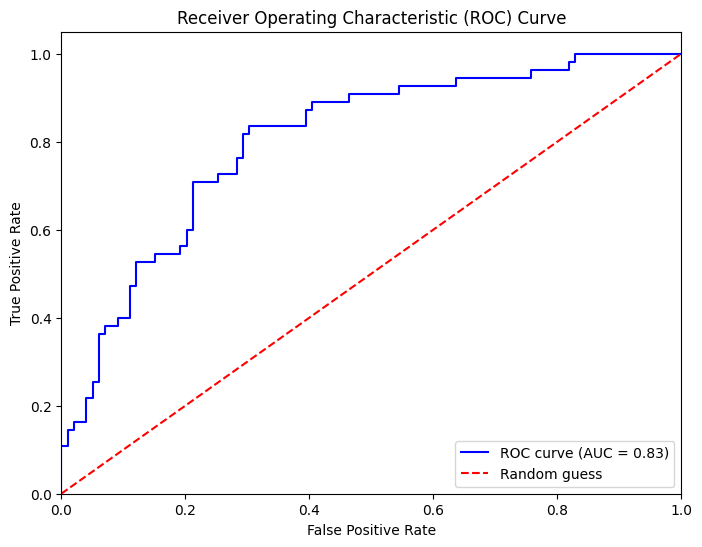

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train_resampled)

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test_selected)
y_proba_xgb = xgb_model.predict_proba(X_test_selected)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f'XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}')

#Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 12: Model Deployment
Once your model is trained, it’s time to deploy it in a real-world environment. A popular approach is to create a Flask API for the model.

In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

['selected_features.pkl']

In [ ]:
#pip install flask